Using Color for Third Variables
One of the most common ways of adding a third variable to a plot in matplotlib and seaborn is through the use of color. You've already seen this with clustered bar charts and heat maps in this lesson. The violinplot, boxplot, and barplot functions can all be made with third-variable clusters by adding a "hue" parameter. Code for heat maps can be adapted to depict third variables rather than counts, just by changing the "weights" parameter for hist2d, or the aggregation functions for your data to be fed into heatmap.

For scatterplots, there are two different ways of setting color, depending on the type of variable. For numeric variables, you can set the "color" or "c" parameter directly in the scatter function call

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,Cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


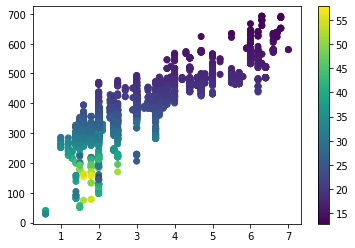

In [5]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'co2', c = 'comb')
plt.colorbar()

If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's FacetGrid class.

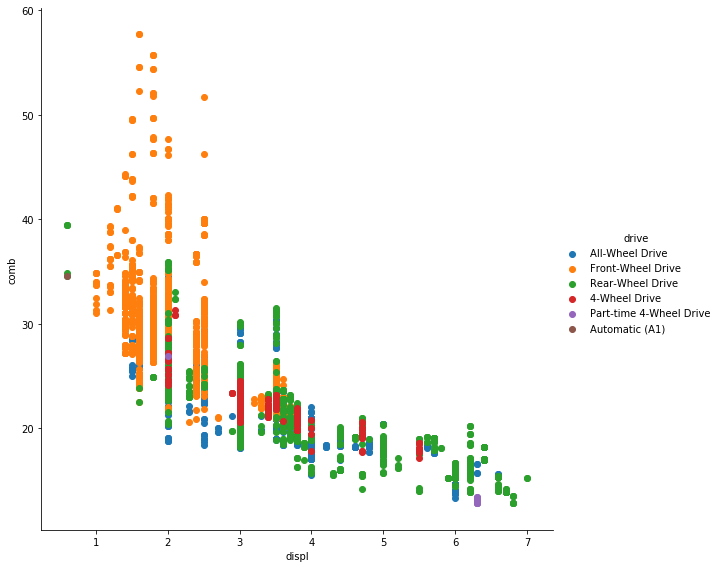

In [10]:
g = sb.FacetGrid(data = fuel_econ, hue = 'drive', size = 8)
g.map(plt.scatter, 'displ', 'comb')
g.add_legend() #Seaborn legend is standard matplotlib legend object. It describes the color of diff. qualitative
#variables on the right.

Types of Color Palettes
Depending on the type of variable you have, you might want to choose a different color palette than the default provided. There are three main palette types to consider: qualitative, sequential, and diverging.

Qualitative palettes are built for nominal-type data. This is the palette class taken by the default palette. In a qualitative palette, consecutive color values are distinct so that there is no inherent ordering of levels implied. Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.

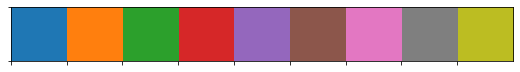

In [14]:
sb.palplot(sb.color_palette(n_colors=9))

For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale. In a sequential palette, consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. The default sequential color map, "viridis", takes the opposite approach, with dark colors indicating low values, and light values indicating high.

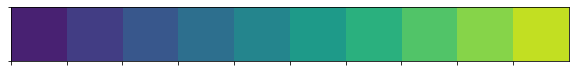

In [17]:
sb.palplot(sb.color_palette('viridis', 10))

Most of the time, a sequential palette will depict ordinal or numeric data just fine. However, if there is a meaningful zero or center value for the variable, you may want to consider using a diverging palette. In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

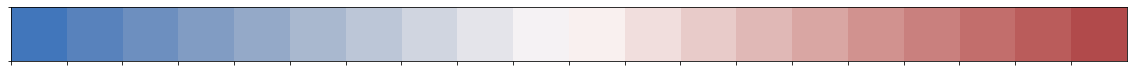

In [24]:
sb.palplot(sb.color_palette('vlag', 20))

Setting a Color Palette
If you want (or need) to change the color map for your plot, the easiest way of doing so is by using one of the built-ins from matplotlib or seaborn. This part of the matplotlib documentation has a list of strings that can be understood for color mappings. For most of your purposes, stick with the palettes in the tables noted as built-in for matplotlib ('viridis' etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. Seaborn also adds in a number of its own palettes:

Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)
For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

How you set your color palette depends on the plotting function used. Check the documentation for specific details. For example, a color palette can be set in FacetGrid through the "palette" parameter, and in scatter through the "cmap" parameter. When using a diverging color palette, you will likely need to specify the "vmin" and "vmax" parameters in order to have the neutral point in the palette meet the center point in the scale. Alternatively, solutions that create a different normalization function like the one posted in this Stack Overflow thread can be used for finer control over the color map. Diverging color scales are common enough for the heatmap type that there is a "center" parameter for setting the central value.

As a closing note, you want to be aware of the effect of transparency and overlap on interpretability. If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data. To be safe here, avoid or minimize transparency in plots with color. You may need to plot only a sample of your points in order to make sure that the effect of the third variable is clearly visible.



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

([], <a list of 0 Text yticklabel objects>)

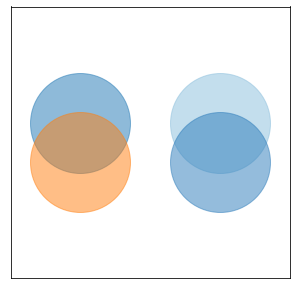

In [25]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, c = sb.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, c = sb.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, c = sb.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, c = sb.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([])

Faceting Across Two Variables
Earlier in the lesson, you saw how FacetGrid could be used to subset your dataset across levels of a categorical variable, and then create one plot for each subset. Where the faceted plots demonstrated were univariate before, you can actually use any plot type, allowing you to facet bivariate plots to create a multivariate visualization.

FacetGrid also allows for faceting a variable not just by columns, but also by rows. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

fuel_econ = pd.read_csv('./fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

g = sb.FacetGrid(data = fuel_econ, col = 'drive', row = 'make', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'comb', 'displ')

Setting margin_titles = True means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.